<a href="https://colab.research.google.com/github/mottasilvia/TESIS/blob/main/train_yolov11_object_detection_on_combinado_dataset_x3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRAIN YOLO V 11 ON CUSTOM DATA tres canchas y todas las clases **

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Sep 30 18:00:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch  # PyTorch es comúnmente usado para verificar la disponibilidad de GPU

# Verifica si CUDA está disponible, lo cual indica la disponibilidad de GPU
if torch.cuda.is_available():
    print(f"GPU Disponible: {torch.cuda.get_device_name(0)}")
else:
    print("GPU No Disponible")

GPU Disponible: Tesla T4


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLO

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 36.5/235.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [ ]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
print(HOME)

/content


In [ ]:
from roboflow import Roboflow
import os
import shutil

# Ruta al directorio del dataset que quieres eliminar
#dataset_dir = f"{os.environ['HOME']}/datasets/test03"
#dataset_dir = f"{os.environ['HOME']}/datasets/test02"
dataset_dir = f"{os.environ['HOME']}/datasets/test04"
#dataset_dir = f"{os.environ['HOME']}/datasets/test03"
#dataset_dir = f"{os.environ['HOME']}/datasets/combine"

# Borrar el directorio si existe
if os.path.exists(dataset_dir):
    shutil.rmtree(dataset_dir)
    print(f"Directorio {dataset_dir} borrado.")





In [ ]:
from roboflow import Roboflow
import os

# Crear un directorio para los datasets
!mkdir -p {os.environ['HOME']}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qoRuT4r6jXcLdFGD8Dc6")

# Descargar el primer dataset


project2 = rf.workspace("maestria").project("test02-ta9qb")
version2 = project2.version(10)
dataset2 = version2.download("yolov11",location=f"{os.environ['HOME']}/datasets/test02")


project3 = rf.workspace("maestria").project("test03-pvwu2")
version3 = project3.version(7)
dataset3 = version3.download("yolov11",location=f"{os.environ['HOME']}/datasets/test03")


project4 = rf.workspace("maestria").project("test04preanotadas")
version4 = project4.version(6)
dataset4 = version4.download("yolov11",location=f"{os.environ['HOME']}/datasets/test04")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /root/datasets/test02 in yolov11:: 100%|██████████| 1902/1902 [00:00<00:00, 3630.19it/s]

loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to /root/datasets/test03 in yolov11:: 100%|██████████| 2012/2012 [00:00<00:00, 4947.04it/s]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /root/datasets/test04 in yolov11:: 100%|██████████| 1536/1536 [00:00<00:00, 3642.92it/s]


In [ ]:
import os
import shutil

# Directorios de los datasets originales
dataset1_dir = "/root/datasets/test02"
dataset2_dir = "/root/datasets/test03"
dataset3_dir = "/root/datasets/test04"

# Directorio del dataset combinado
combined_dataset_dir = "/root/datasets/combine"

# Crear la estructura de directorios para el dataset combinado
for subdir in ["train", "test", "valid"]:
    os.makedirs(os.path.join(combined_dataset_dir, subdir, "images"), exist_ok=True)
    os.makedirs(os.path.join(combined_dataset_dir, subdir, "labels"), exist_ok=True)

# Función para combinar los archivos de imágenes y etiquetas de un dataset en el dataset combinado
def combine_datasets(src_dir, dst_dir):
    for subdir in ["train", "test", "valid"]:
        src_images = os.path.join(src_dir, subdir, "images")
        src_labels = os.path.join(src_dir, subdir, "labels")
        dst_images = os.path.join(dst_dir, subdir, "images")
        dst_labels = os.path.join(dst_dir, subdir, "labels")

        if os.path.exists(src_images):
            for file_name in os.listdir(src_images):
                shutil.copy(os.path.join(src_images, file_name), os.path.join(dst_images, file_name))

        if os.path.exists(src_labels):
            for file_name in os.listdir(src_labels):
                shutil.copy(os.path.join(src_labels, file_name), os.path.join(dst_labels, file_name))



# Combinar los dos datasets en el dataset combinado
combine_datasets(dataset1_dir, combined_dataset_dir)
combine_datasets(dataset2_dir, combined_dataset_dir)
combine_datasets(dataset3_dir, combined_dataset_dir)

print("Datasets combinados con éxito en:", combined_dataset_dir)


Datasets combinados con éxito en: /root/datasets/combine


In [ ]:
import os
import pandas as pd
from IPython.display import display  # Import the display function


# Función para contar archivos en los subdirectorios de imágenes y etiquetas
def count_files_in_directories(dir_path):
    data = []
    subdirs = ["train", "test", "valid"]

    for subdir in subdirs:
        images_dir = os.path.join(dir_path, subdir, "images")
        labels_dir = os.path.join(dir_path, subdir, "labels")

        # Contar archivos en imágenes y etiquetas
        image_count = len(os.listdir(images_dir)) if os.path.exists(images_dir) else 0
        label_count = len(os.listdir(labels_dir)) if os.path.exists(labels_dir) else 0

        data.append({
            "Dataset": os.path.basename(dir_path),
            "Subdir": subdir,
            "Images": image_count,
            "Labels": label_count
        })

    return data

# Directorios de los datasets originales
dataset1_dir = "/root/datasets/test02"
dataset2_dir = "/root/datasets/test03"
dataset3_dir = "/root/datasets/test04"

# Directorio del dataset combinado
combined_dataset_dir = "/root/datasets/combine"

# Lista de directorios para recorrer
dataset_dirs = [dataset1_dir, dataset2_dir, dataset3_dir, combined_dataset_dir]

# Recoger los datos para todos los datasets
all_data = []
for dataset_dir in dataset_dirs:
    counts = count_files_in_directories(dataset_dir)
    all_data.extend(counts)

# Crear un DataFrame de pandas para organizar la información
df = pd.DataFrame(all_data)

# Mostrar la tabla
display(df) # Use display from IPython.display


,Dataset,Subdir,Images,Labels
0,test02,train,661,661
1,test02,test,95,95
2,test02,valid,189,189
3,test03,train,700,700
4,test03,test,100,100
5,test03,valid,200,200
6,test04,train,624,624
7,test04,test,41,41
8,test04,valid,97,97
9,combine,train,1985,1985


In [ ]:
from ultralytics import YOLO

In [ ]:
!pip install -U ultralytics
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.6/214.6 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/root/datasets/combine/data.yaml epochs=25 imgsz=800 plots=True
#!yolo task=detect mode=train model=yolov11s.pt data=/root/datasets/combine/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/root/datasets/combine/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

In [ ]:
!echo $HOME

/root


In [ ]:
!ls /content/runs/detect/train9


args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1727721610.b427b586eb5a.13426.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1875.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch1876.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch1877.jpg  weights
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg


In [ ]:
from IPython.display import Image


In [ ]:
HOME="/content"

In [ ]:
#Import the IPython.display module and Image within the same cell to make it accessible
from IPython.display import Image

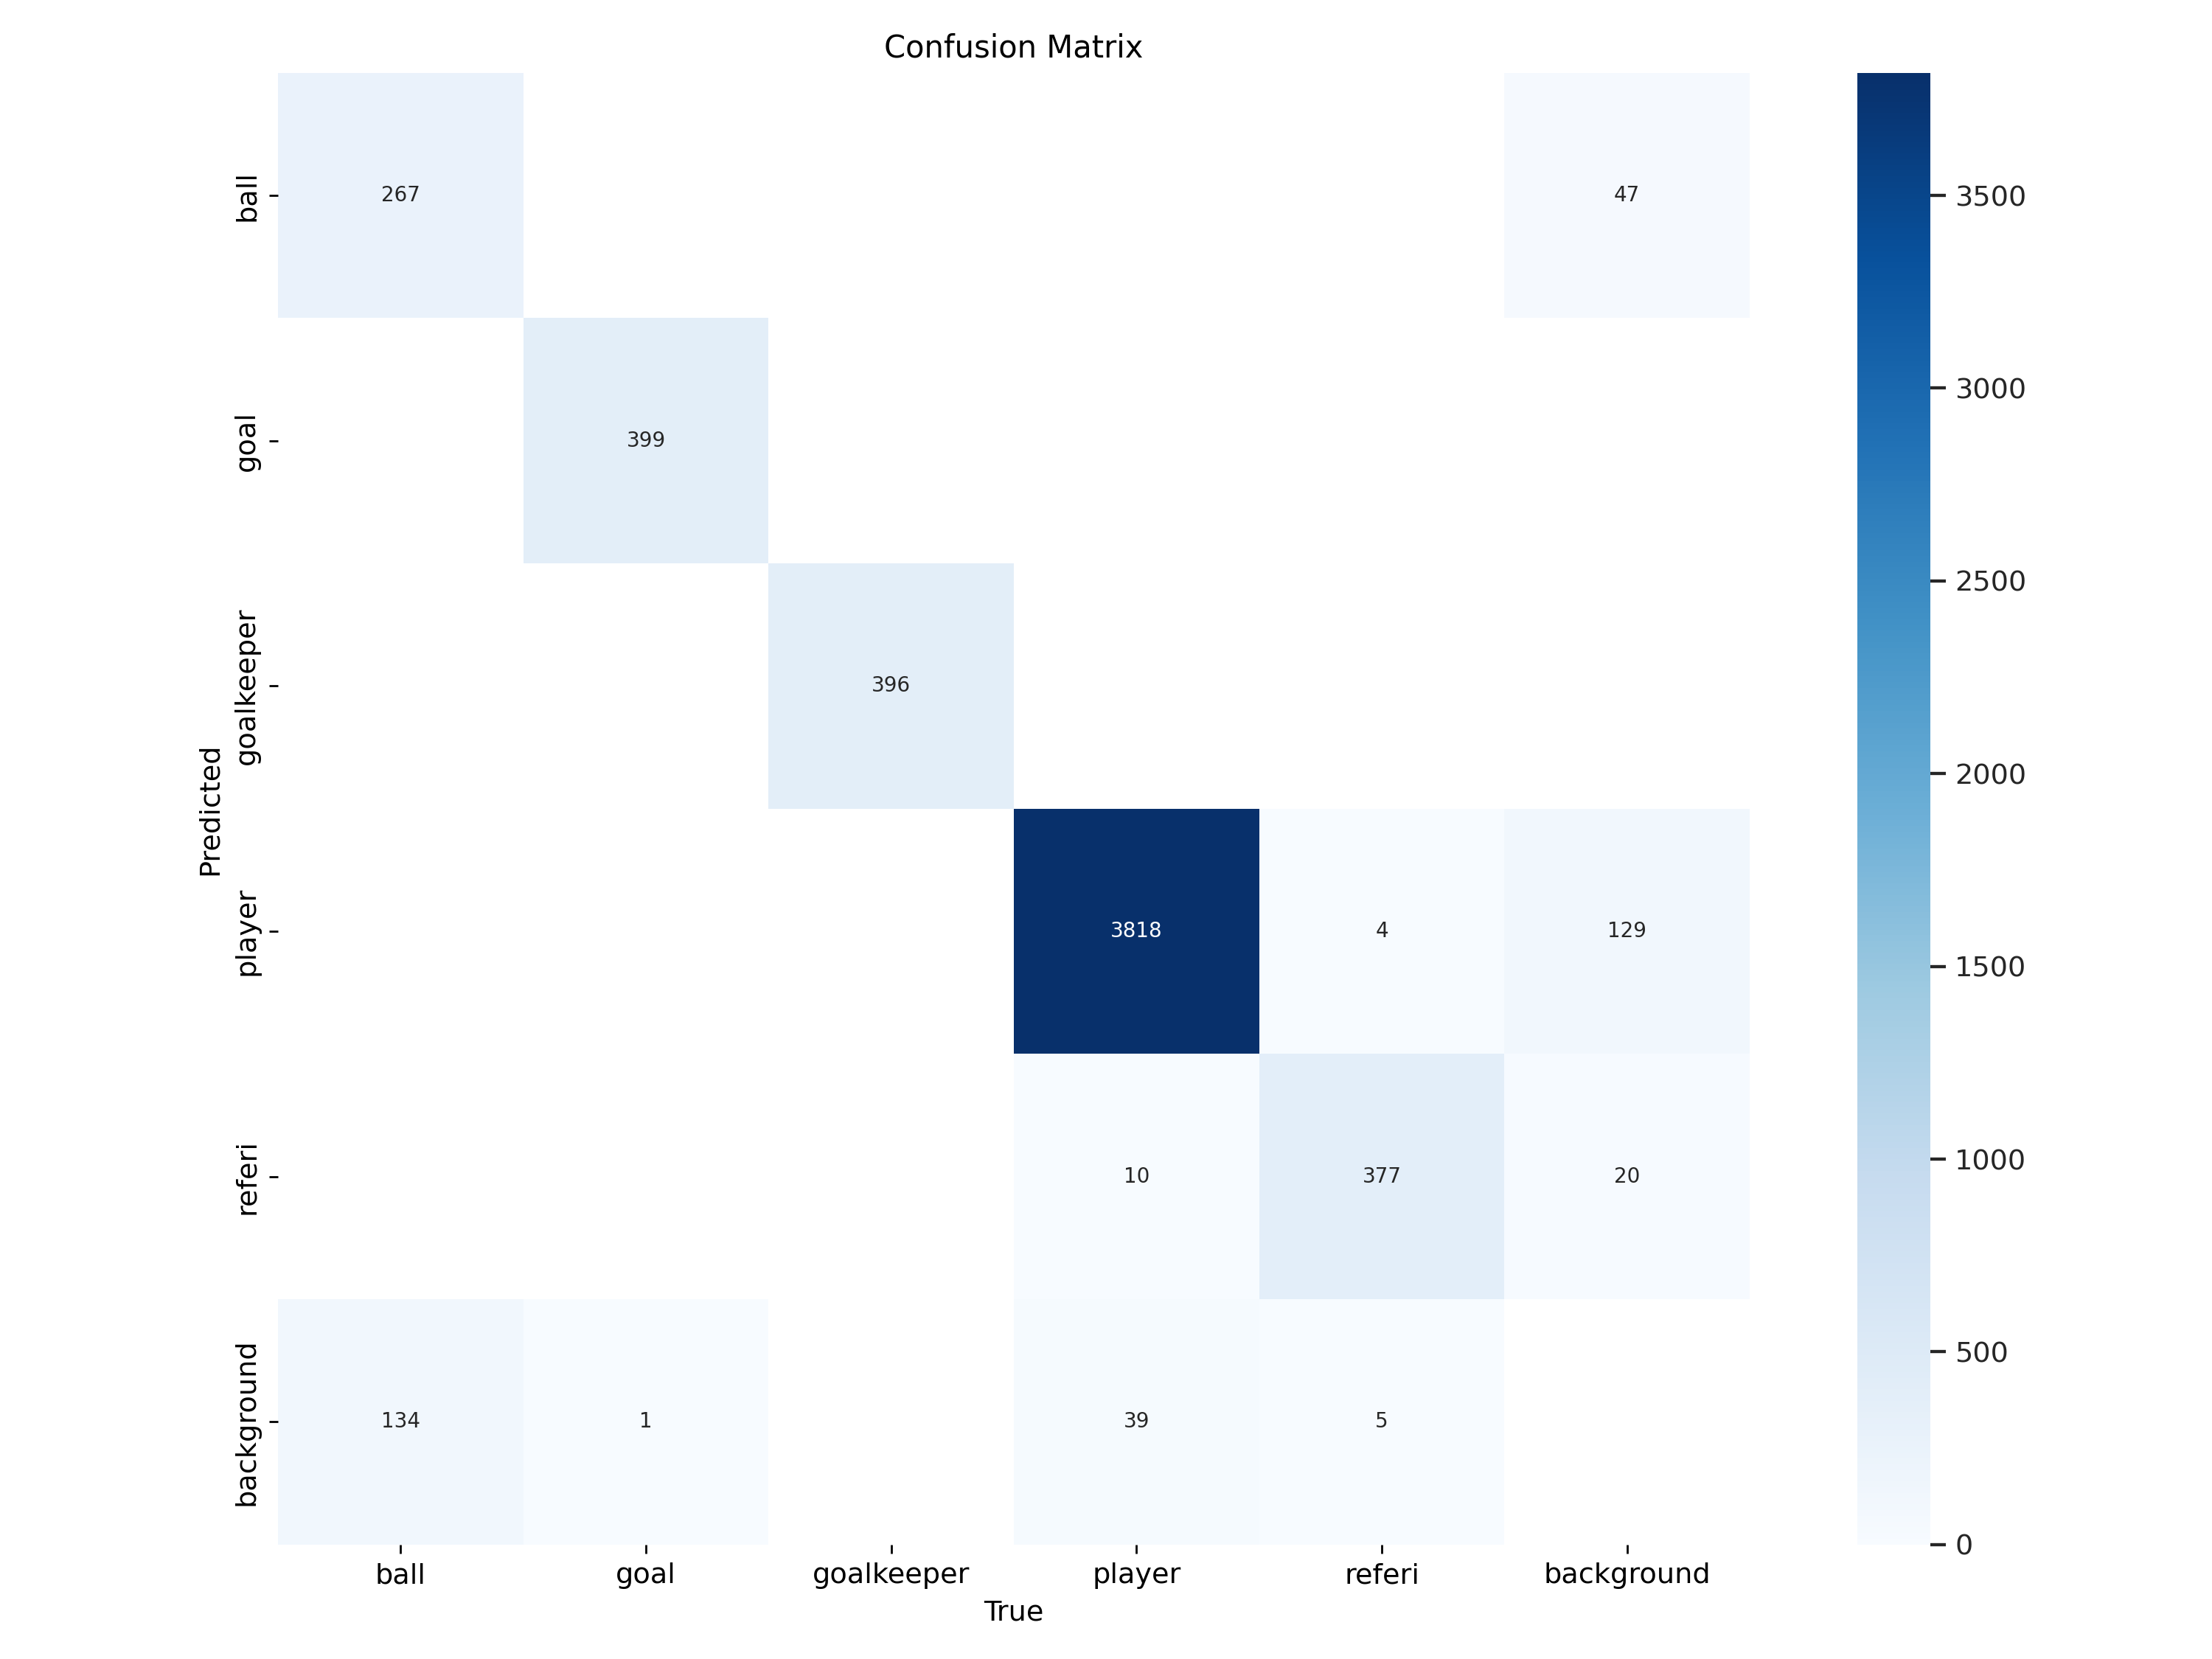

In [ ]:
Image(filename='/content/runs/detect/train9/confusion_matrix.png', width=600)


/content


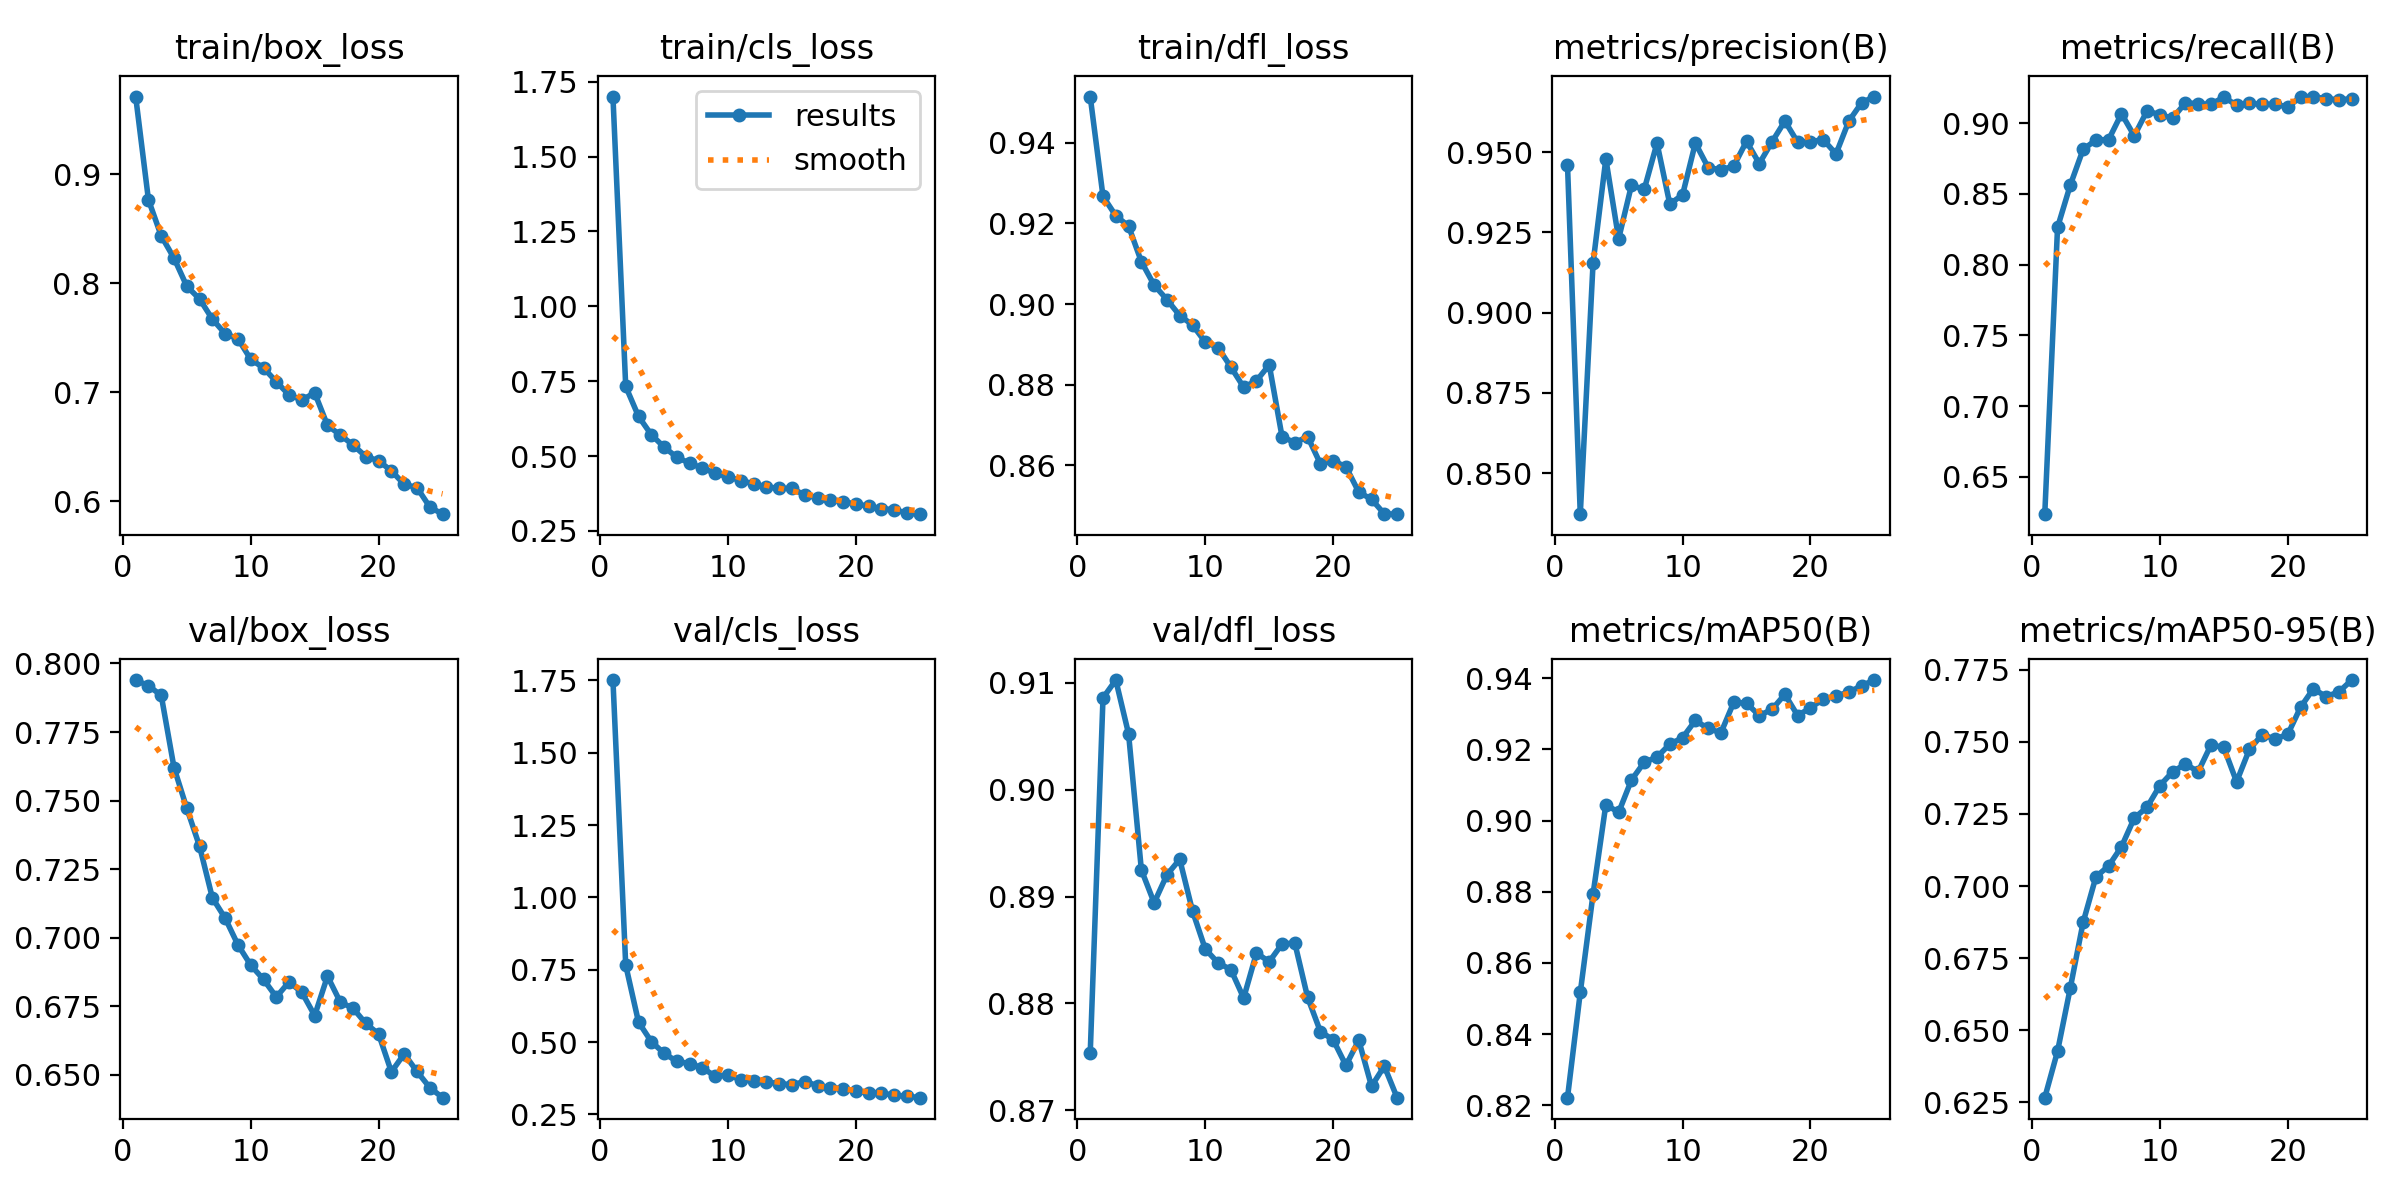

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/train9/results.png', width=600)

/content


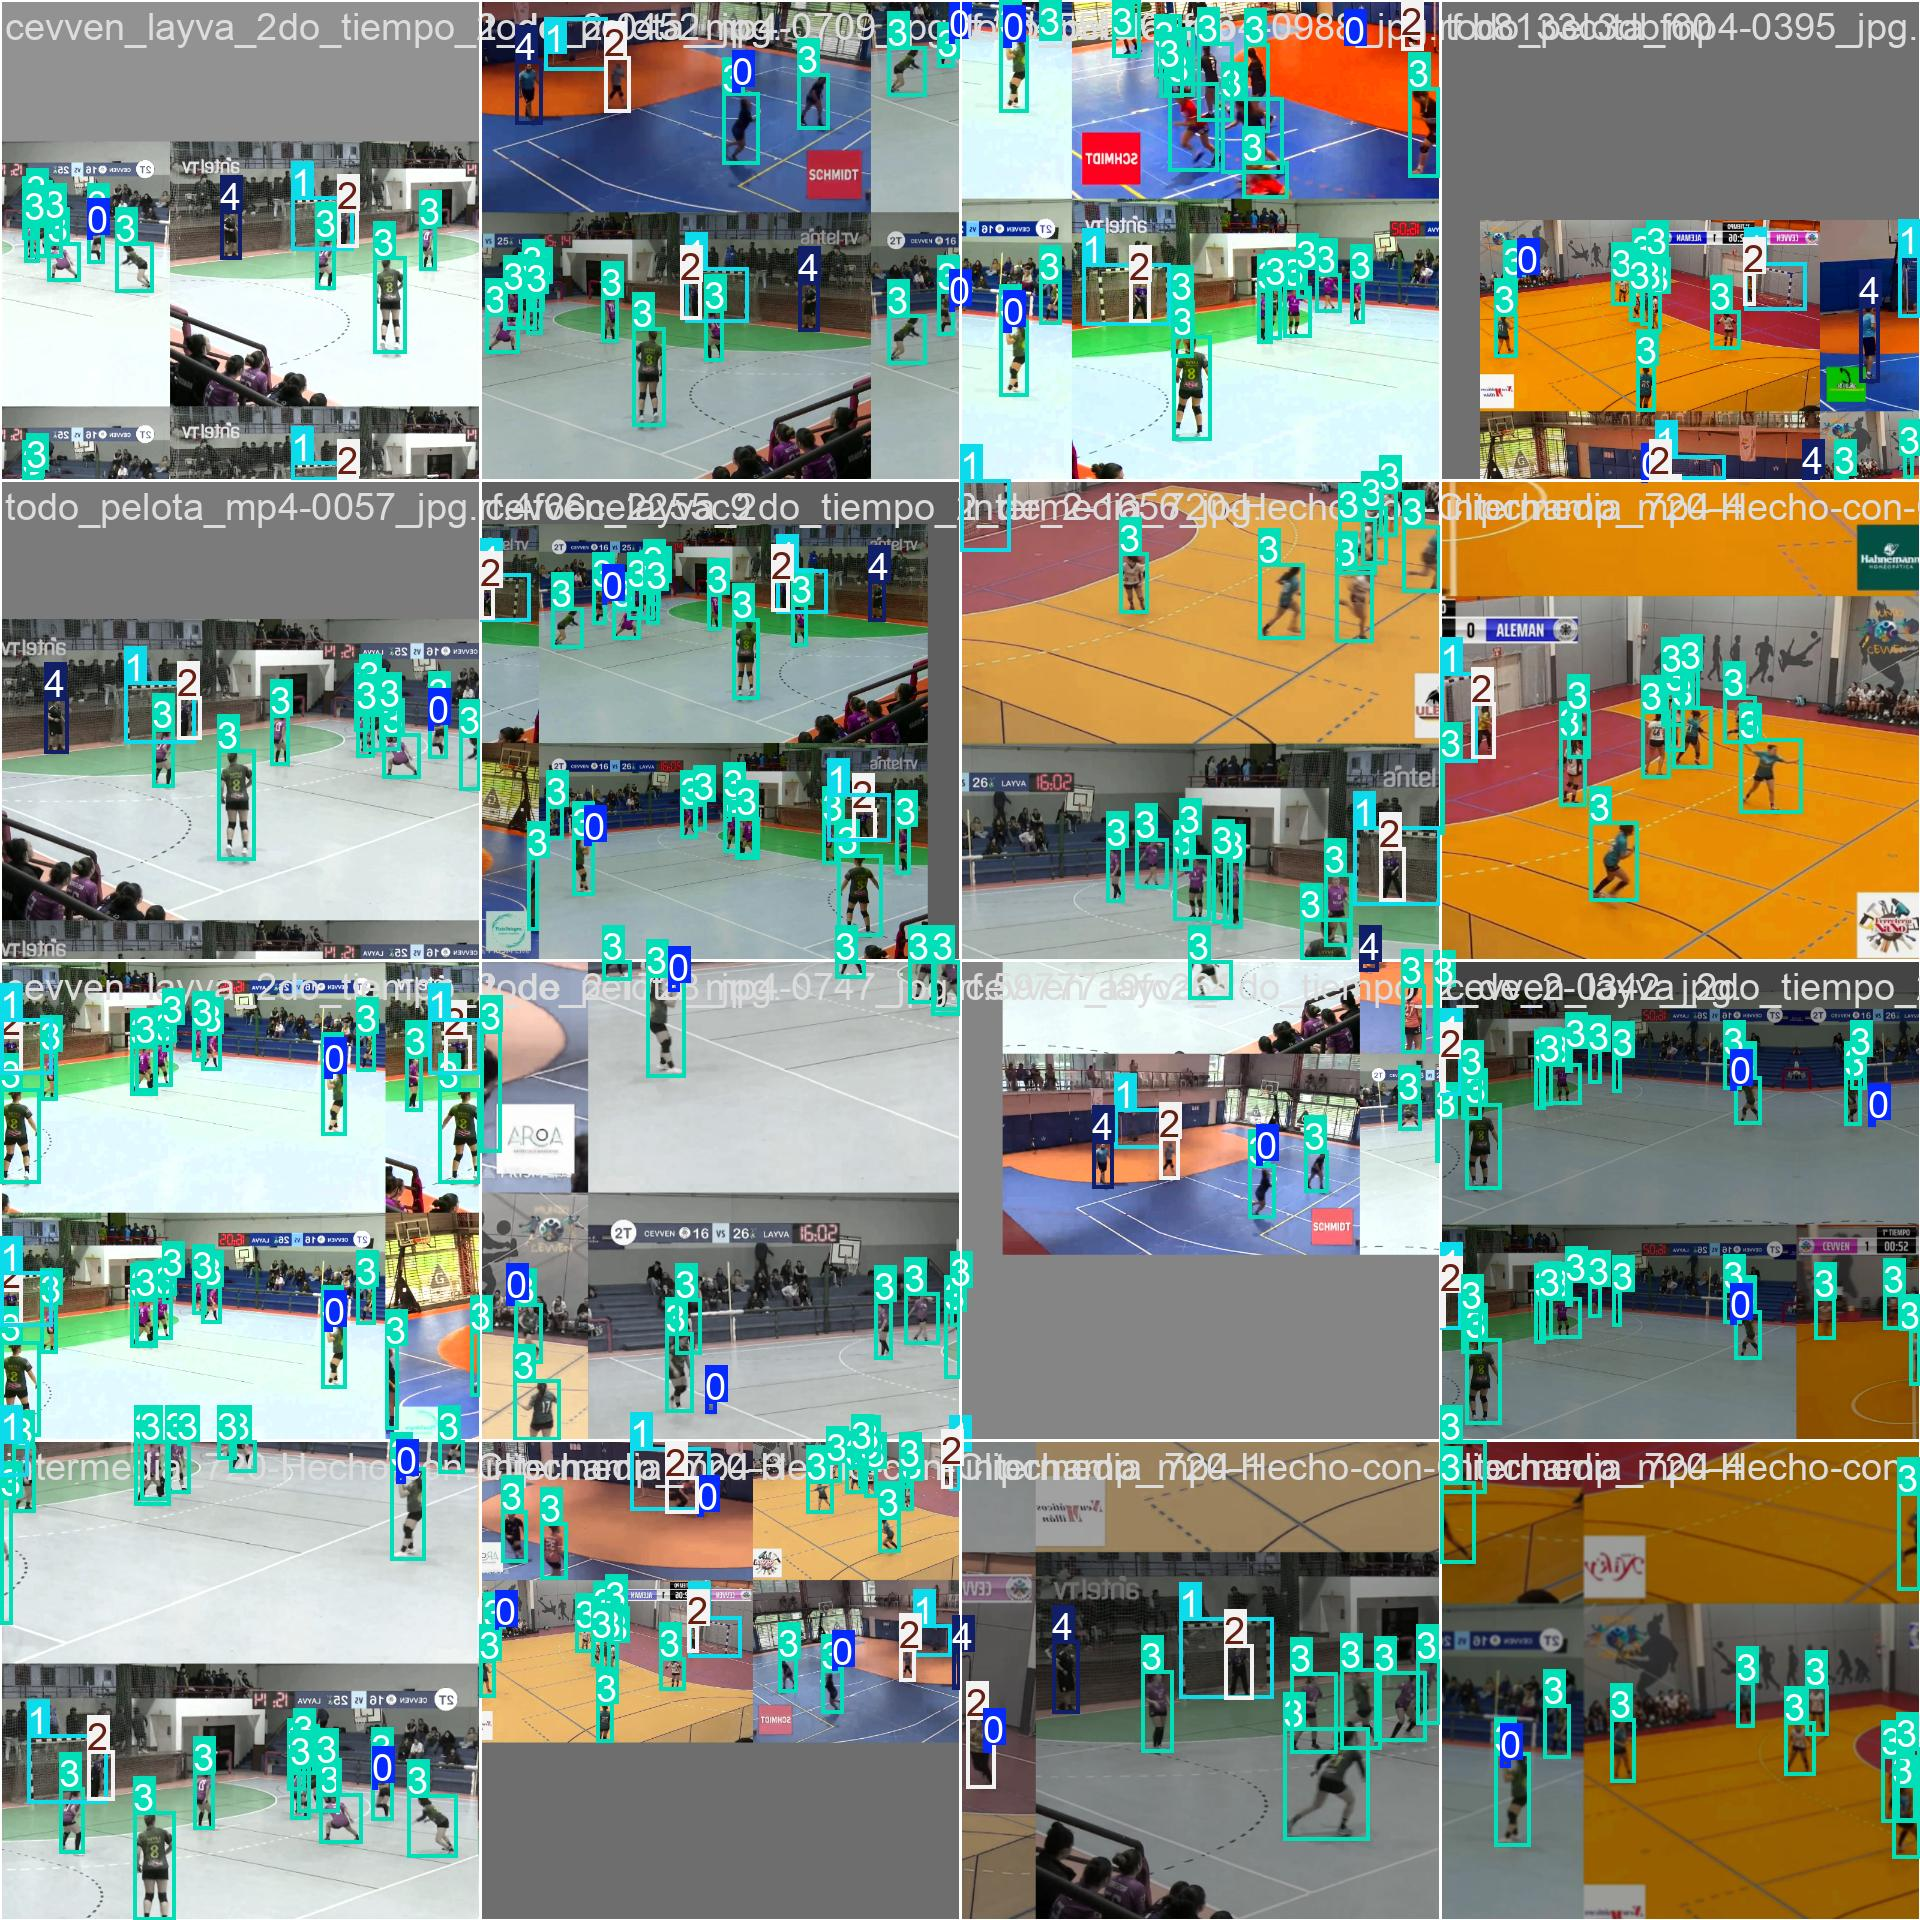

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train9/train_batch1.jpg', width=600)


## Validate Custom Model

In [ ]:
%cd {HOME}


!yolo task=detect mode=val model=/content/runs/detect/train9/weights/best.pt  data=/root/datasets/combine/data.yaml


/content
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,829,599 parameters, 0 gradients, 23.4 GFLOPs
val: Scanning /root/datasets/combine/val/labels.cache... 486 images, 0 backgrounds, 0 corrupt: 100% 486/486 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:07<00:00,  3.99it/s]
                   all        486       5450      0.968      0.917      0.939      0.771
                  ball        401        401      0.915      0.618      0.728      0.388
                  goal        400        400      0.999      0.998      0.995      0.944
            goalkeeper        396        396      0.999          1      0.995      0.833
                player        484       3867      0.973      0.984      0.992      0.856
                referi        293        386      0.954      0.987      0.987      0.836
Speed: 0.5ms preprocess, 6.9ms inference, 0

## Inference with Custom Model

In [ ]:

!yolo task=detect mode=predict  model=/content/runs/detect/train6/weights/best.pt source=/content/datasets/Test02-2/test/images

#!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
#!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source=/content/Test02-2/test/images save=True

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:50]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/vlc-record.mp4' save=True


/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 72.5ms
video 1/1 (2/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.6ms
video 1/1 (3/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.5ms
video 1/1 (4/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.5ms
video 1/1 (5/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.5ms
video 1/1 (6/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.5ms
video 1/1 (7/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.3ms
video 1/1 (8/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.2ms
video 1/1 (9/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.2ms
video 1/1 (10/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.2ms
video 1/1 (

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train6/weights/best.pt conf=0.25 source='/content/drive/MyDrive/intermedia_720p.mp4' save=True


/content
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,828,051 parameters, 0 gradients, 23.3 GFLOPs

video 1/1 (frame 1/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 (no detections), 40.7ms
video 1/1 (frame 2/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 (no detections), 14.3ms
video 1/1 (frame 3/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 (no detections), 14.3ms
video 1/1 (frame 4/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 (no detections), 14.3ms
video 1/1 (frame 5/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 (no detections), 14.3ms
video 1/1 (frame 6/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 14.3ms
video 1/1 (frame 7/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 14.4ms
video 1/1 (frame 8/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 (no detections), 14.3ms
video 1/1 (frame 9/8634) /content/dri

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Ahora puedes mover o copiar archivos desde Colab a tu Google Drive
#!cp -r /content/Test01-3/ /content/drive/MyDrive/Test01-3/
#!cp -r /content/runs/ /content/drive/MyDrive/Test01-3/runs/
# !cp -r  /content/datasets/Test02-3 /content/drive/MyDrive/Test02-3_p6




Mounted at /content/drive


In [ ]:
!cp -r  /content/runs/detect/train9/ /content/drive/MyDrive/Test04-yolo11n/

In [ ]:
import shutil
import os

# Define las rutas origen y destino
src_dir = "/content/datasets/runs/"
dst_dir = "/content/drive/MyDrive/Test03_p2/"

# Asegúrate de que el directorio destino existe
os.makedirs(dst_dir, exist_ok=True)

# Copia el contenido del directorio fuente al directorio destino
shutil.copytree(src_dir, dst_dir, dirs_exist_ok=True)

print("Copia completada.")





Copia completada.


In [ ]:
# Comprimir el directorio
!zip -r /content/datasets/runs.zip /content/datasets/runs


  adding: content/datasets/runs/ (stored 0%)
  adding: content/datasets/runs/detect/ (stored 0%)
  adding: content/datasets/runs/detect/val/ (stored 0%)
  adding: content/datasets/runs/detect/val/val_batch2_labels.jpg (deflated 9%)
  adding: content/datasets/runs/detect/val/val_batch0_pred.jpg (deflated 6%)
  adding: content/datasets/runs/detect/val/confusion_matrix.png (deflated 39%)
  adding: content/datasets/runs/detect/val/P_curve.png (deflated 17%)
  adding: content/datasets/runs/detect/val/val_batch1_labels.jpg (deflated 7%)
  adding: content/datasets/runs/detect/val/val_batch0_labels.jpg (deflated 6%)
  adding: content/datasets/runs/detect/val/confusion_matrix_normalized.png (deflated 40%)
  adding: content/datasets/runs/detect/val/F1_curve.png (deflated 18%)
  adding: content/datasets/runs/detect/val/val_batch1_pred.jpg (deflated 7%)
  adding: content/datasets/runs/detect/val/R_curve.png (deflated 18%)
  adding: content/datasets/runs/detect/val/val_batch2_pred.jpg (deflated 9%)

In [ ]:
from google.colab import files

# Descargar el archivo comprimido
files.download('/content/datasets/runs.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Volver a montar Google Drive
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive
